pdf: [link](https://drive.google.com/file/d/1G-yLK8kNMVW1MMzwfrLhx1yIQi2QIh2L/view?usp=sharing)

video: [link](https://drive.google.com/file/d/1dkCn9AHNQwafNj5C40YGci7B0VSCaLWY/view?usp=sharing)

colab: [link](https://colab.research.google.com/drive/1sO2LvkNRY7lfUY4GyHUmAvMd-N1FYCXn?usp=sharing)

Reinforcemnrt Learning algorithms 

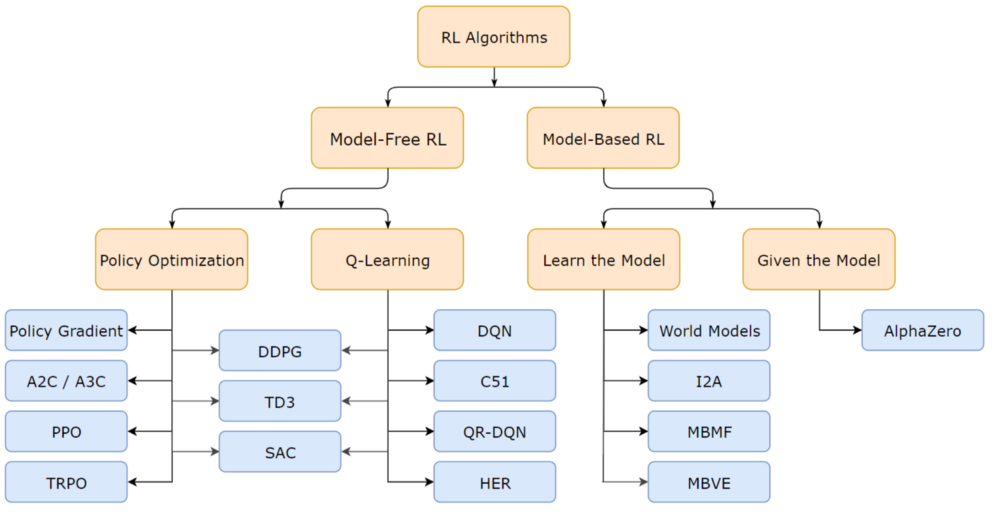

In [ ]:
import gym
import numpy as np
import torch 
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import time
import copy
%matplotlib inline 

In [ ]:
env = gym.make("CartPole-v1")

CartPle-v1: [link](https://gym.openai.com/envs/CartPole-v1/)

Environment states:
1- Cart position
2- Cart velocity
3- Pole angle
4- Pole angular velocity

Environment actions:
1- Move cart left
2- Move cart right

In [ ]:
n_actions = env.action_space.n     # number of actions
input_dim = env.observation_space.shape[0]  # states
# Q(S, a)  input= input_dim , output = n_actions +1 or -1 for this problem
model =nn.Sequential(nn.Linear(input_dim,32),
                     nn.ReLU(),
                     nn.Linear(32,16),
                     nn.ReLU(),
                     nn.Linear(16,n_actions))
model_target = copy.deepcopy(model)
loss_fn = nn.MSELoss()
Learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(),lr= Learning_rate)

In [ ]:
# number of actions and states
print(n_actions)
print(input_dim)

2
4


In [ ]:
def learning(replay_memory,traget_update,minibatch_size = 32):
    
    minibatch = np.random.choice(replay_memory, minibatch_size ,replace = True)
    s = np.array(list(map(lambda x:x['s'] , minibatch)))   # state
    a = np.array(list(map(lambda x:x['a'] , minibatch)))   # action
    r = np.array(list(map(lambda x:x['r'] , minibatch)))   # reward
    sprime = np.array(list(map(lambda x:x['sprime'] , minibatch)))   # next state
    done = np.array(list(map(lambda x:x['done'] , minibatch)))       # done or not
    
    global model_target
    if traget_update == True:
        model_target = copy.deepcopy(model)      
    q_s = model(torch.tensor(s).float())
    q_sprime = model_target(torch.tensor(sprime).float())
    q_s_target = q_s.detach().clone()
    
    for i,(s1,a1,r1,q_sprime1,done1) in enumerate(zip(s,a,r,q_sprime,done)):
        if not done1: target = r1 + gamma * torch.max(q_sprime1)
        else:target = r1
        q_s_target[i][a1] = target
            
    optimizer.zero_grad()
    loss = loss_fn(q_s , q_s_target)
    loss.backward()
    optimizer.step()

In [ ]:
n_episodes = 1000 #episodes
gamma = 0.95 # discoiunt factor
epsilon = 1 # epsilon greedy
minibatch_size = 32
s_rewards = []
replay_memory = []
mem_max_size = 120000
for n in range(n_episodes):
    s = env.reset()
    done = False
    rew = 0
    flag = 1
    
    while not done:
        q_s = model(torch.tensor(s).float())
        if np.random.random() < epsilon :
            a = env.action_space.sample()
        else:
            a = np.argmax(q_s.detach().numpy())
            
        sprime,r,done,info = env.step(a)
        rew += r
        if len(replay_memory) > mem_max_size:
            replay_memory.pop(0)
        replay_memory.append({"s":s,"a":a,"r":r,"sprime":sprime,"done":done})
        s = sprime
        if n %1 == 0 and flag == 1:
            flag = 0 
            traget_update = True
        else:
            traget_update = False 
        learning(replay_memory,traget_update,minibatch_size = minibatch_size)
    if epsilon > 0.01:
        epsilon -= 0.001
    s_rewards.append(rew)
    print(f"episode {n+1}  :  {rew}")

episode 1  :  25.0
episode 2  :  14.0
episode 3  :  15.0
episode 4  :  32.0
episode 5  :  17.0
episode 6  :  46.0
episode 7  :  11.0
episode 8  :  15.0
episode 9  :  17.0
episode 10  :  16.0
episode 11  :  24.0
episode 12  :  15.0
episode 13  :  15.0
episode 14  :  32.0
episode 15  :  13.0
episode 16  :  36.0
episode 17  :  62.0
episode 18  :  21.0
episode 19  :  31.0
episode 20  :  16.0
episode 21  :  8.0
episode 22  :  12.0
episode 23  :  17.0
episode 24  :  16.0
episode 25  :  24.0
episode 26  :  16.0
episode 27  :  25.0
episode 28  :  14.0
episode 29  :  19.0
episode 30  :  19.0
episode 31  :  15.0
episode 32  :  22.0
episode 33  :  40.0
episode 34  :  17.0
episode 35  :  10.0
episode 36  :  19.0
episode 37  :  20.0
episode 38  :  10.0
episode 39  :  16.0
episode 40  :  19.0
episode 41  :  15.0
episode 42  :  20.0
episode 43  :  31.0
episode 44  :  23.0
episode 45  :  26.0
episode 46  :  26.0
episode 47  :  10.0
episode 48  :  24.0
episode 49  :  51.0
episode 50  :  12.0
episode 51

Text(0, 0.5, 'r_average')

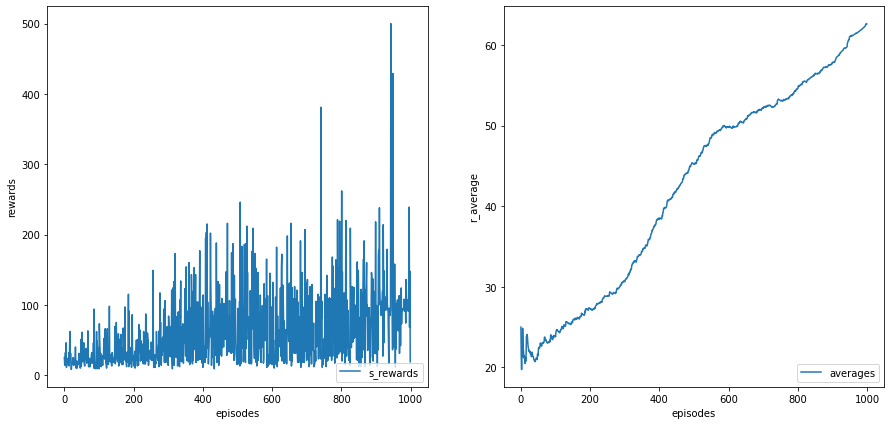

In [ ]:
averages,memory = [],s_rewards[0]
s = 2
for i in s_rewards:
    memory += i
    averages.append(memory/s)
    s+=1
fig, ax = plt.subplots(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(s_rewards)
plt.legend(['s_rewards'], loc=4)
plt.xlabel("episodes");plt.ylabel("rewards")
plt.subplot(1, 2, 2)
plt.plot(averages)
plt.legend(['averages'], loc=4)
plt.xlabel("episodes");plt.ylabel("r_average")

Email: arash.lagzian94@gmail.com